In [2]:
import sys
sys.path.append('..')
from dataset import spiral
import matplotlib.pyplot as plt
import numpy as np
from common.layers import Affine, Sigmoid, SoftmaxWithLoss
from common.optimizer import SGD

In [3]:
x, t = spiral.load_data()
print('x', x.shape)
print('t', t.shape)

x (300, 2)
t (300, 3)


In [4]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size

        # 가중치와 편향 초기화
        W1 = 0.01 * np.random.randn(I, H)
        b1 = np.zeros(H)
        W2 = 0.01 * np.random.randn(H, O)
        b2 = np.zeros(O)

        # 계층 생성
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]
        self.loss_layer = SoftmaxWithLoss()

        # 모든 가중치와 기울기를 리스트에 모은다.
        self.params, self.grads = [], []
        for layers in self.layers:
            self.params += layers.params        # 각 레이어에도 params와 grads에 대한 저장공간이 존재.
            self.grads += layers.grads          # 다만 각 매개변수의 참조(주소)값을 복사하기 때문에 메모리 문제는 없음
        
    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x
    
    def forward(self, x, t):
        score = self.predict(x)
        loss = self.loss_layer.forward(score, t)
        return loss
    
    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

In [5]:
# 하이퍼파라미터 설정
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

In [6]:
# 데이터 읽기, 모델과 옵티마이저 설정
x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

In [7]:
# 학습에 사용하는 변수
data_size = len(x)
max_iters = data_size // batch_size
total_loss = 0
loss_count = 0
loss_list = []

for epoch in range(max_epoch):      # 전체 데이터 반복
    # 데이터 뒤섞기
    idx = np.random.permutation(data_size)
    x = x[idx]
    t = t[idx]

    for iters in range(max_iters):      # 전체 데이터의 부분 반복
        batch_x = x[iters*batch_size:(iters+1)*batch_size]
        batch_t = t[iters*batch_size:(iters+1)*batch_size]

        # 기울기를 구해 매개변수 갱신
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)

        total_loss += loss
        loss_count += 1

        # 정기적으로 학습 경과 출력
        if (iters+1) % 10 == 0:
            avg_loss = total_loss / loss_count
            # print('| 에폭 %d | 반복 %d / %d | 손실 %.2f' 
            #       % (epoch+1, iters + 1, max_iters, avg_loss))
            loss_list.append(avg_loss)
            total_loss, loss_count = 0, 0
            

/var/folders/2v/b65115v14cvgvjztf82wr9x80000gn/T/ipykernel_83413/431628818.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


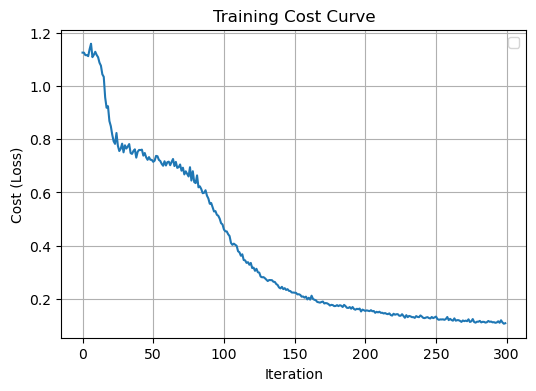

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(loss_list)
plt.xlabel("Iteration")
plt.ylabel("Cost (Loss)")
plt.title("Training Cost Curve")
plt.grid(True)
plt.show()

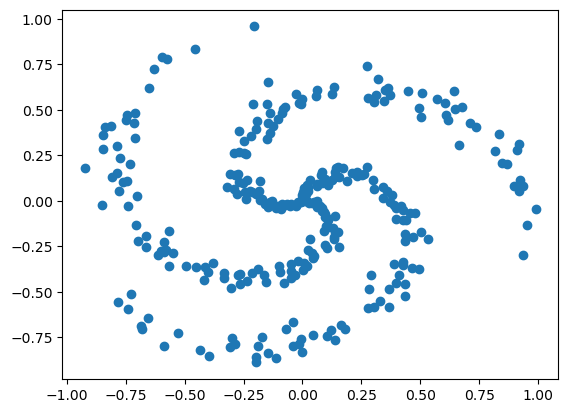

In [ ]:
plt.figure()        
plt.scatter(x[:, 0], x[:, 1])
plt.show()